In this notebook wew go step by step to decompose a time series. We compute the moving average then calculate R2 and R2 error for priavte construction spending between the years 2002 and 2013. 

Below we import the needed packages

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Reading in the Construction Spending CSV and wrote the squared error function

In [11]:
dfCS = pd.read_csv(r"C:\Users\semion.carter\Personal Documents\CTBA\CTBA\M3\ConstructionTimeSeriesdataV2.csv")

def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2

In [12]:
#Initializing new column headers for the dataframe
dfCS.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002,month = 1,day = 31),periods = len(dfCS['Private Construction']))

dfCS['MovAvg'] = np.NaN
dfCS['sqErr'] = np.NaN

In [13]:
#Replacing index with date in yyyy-mm-dd formatting then setting window size and computing the moving average of the timeseries

window = 12
window = window - window % 2
for i in range(int(window/2),dfCS.shape[0]-int(window/2)):
    dfCS.loc[dfCS.index[i],'MovAvg'] = (.5*dfCS.iloc[i - int(window/2)]['Private Construction'] + dfCS.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*dfCS.iloc[i + int(window/2)]['Private Construction'])/float(window)


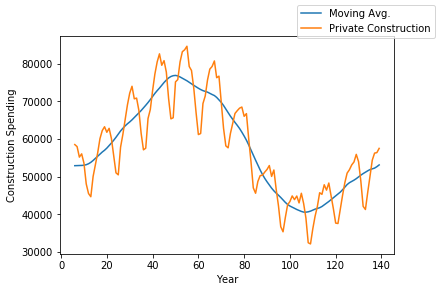

In [14]:
#Here we calculate the squared error and plot the original series against the moving average
dfCS['sqErr'] = (dfCS['Private Construction'] - dfCS['MovAvg'])**2

dfCS.dropna(how='any',inplace=True)

    
fig, ax = plt.subplots()
ax.plot(dfCS['MovAvg'],label='Moving Avg.')
ax.plot(dfCS['Private Construction'],label = 'Private Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
fig.legend()

period =  12     Max Corr =  0.9718794492320808


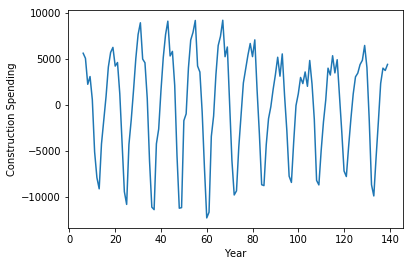

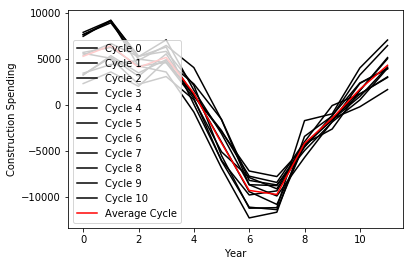

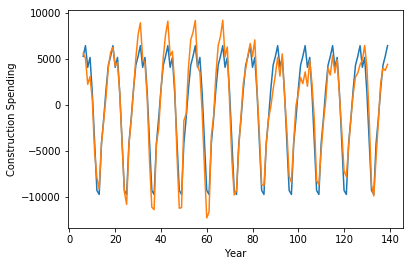

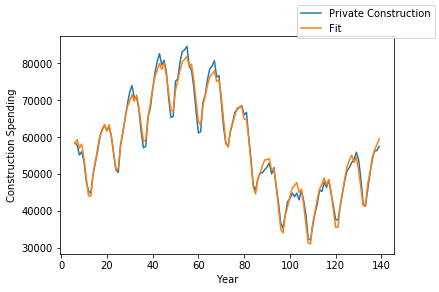

In [15]:
# Caluclate R1,R2 along with their errors for Private Construction

dfCS['R1'] = dfCS['Private Construction'] - dfCS['MovAvg']
dfCS['R1Error'] = abs((dfCS['Private Construction'] - dfCS['R1'])/dfCS['Private Construction'])

fig, ax = plt.subplots()
ax.plot(dfCS['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')

maxCorr = 0.0
period = np.NaN
for i in range(1,window+1):
    corr = dfCS['R1'].autocorr(lag=i)
    if corr> maxCorr:
        maxCorr = corr
        period = i
print('period = ', period,'    Max Corr = ',maxCorr)

cycleLen = period
numCycles = int(len(dfCS)/cycleLen+.5)
cycles = [dfCS.iloc[range(i*period,min((i+1)*period,len(dfCS)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfCS.iloc[range(i,len(dfCS['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig, ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
ax.legend()

dfCS['C'] = np.NaN
for i in range(len(dfCS)):
    dfCS.loc[dfCS.index[i], 'C'] = avg[i % cycleLen]
    
fig,ax = plt.subplots()

ax.plot(dfCS['C'], label='Cyclic Pattern')
ax.plot(dfCS['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')

dfCS['R2Private'] = dfCS['R1'] - dfCS['C']
dfCS['R2Error'] = abs(dfCS['R2Private'])/dfCS['Private Construction']
dfCS['fit'] = dfCS['MovAvg'] + dfCS['C']
#dfCS.drop(['sqErr'],axis=1,inplace=True)

fig,ax = plt.subplots()

ax.plot(dfCS['Private Construction'], label = 'Private Construction')
ax.plot(dfCS['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
fig.legend()

period =  12     Max Corr =  0.9885165843674653


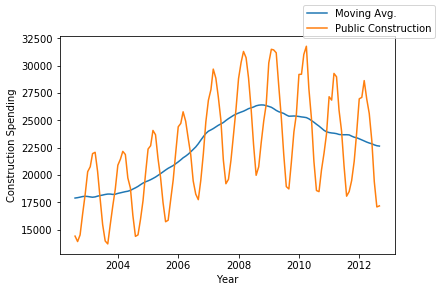

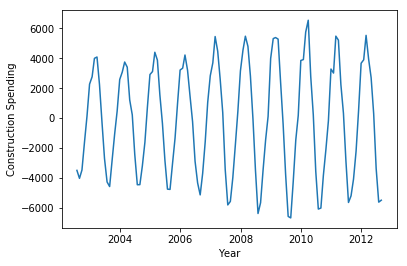

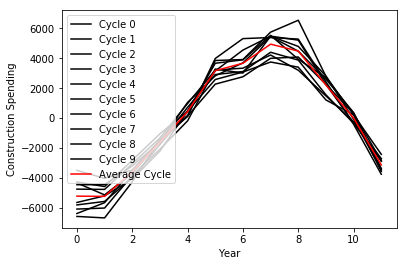

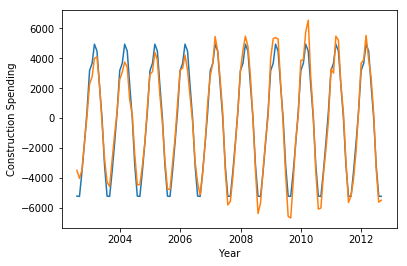

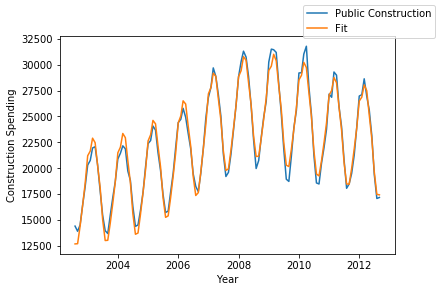

In [16]:
# Here we do the same as above just for the public Construction
def sqErr(row):
    return (row['Public Construction'] - row['MovAvg'])**2

dfCS.index = pd.DatetimeIndex(freq='m', start=pd.Timestamp(year=2002,month = 1,day = 31),periods = len(dfCS['Public Construction']))

dfCS['MovAvg'] = np.NaN
dfCS['sqErr'] = np.NaN

window = 12
window = window - window % 2
for i in range(int(window/2),dfCS.shape[0]-int(window/2)):
    dfCS.loc[dfCS.index[i],'MovAvg'] = (.5*dfCS.iloc[i - int(window/2)]['Public Construction'] + dfCS.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*dfCS.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfCS['sqErr'] = (dfCS['Public Construction'] - dfCS['MovAvg'])**2

dfCS.dropna(how='any',inplace=True)

    
fig, ax = plt.subplots()
ax.plot(dfCS['MovAvg'],label='Moving Avg.')
ax.plot(dfCS['Public Construction'],label = 'Public Construction')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
fig.legend()

dfCS['R1'] = dfCS['Public Construction'] - dfCS['MovAvg']
dfCS['R1Error'] = abs((dfCS['Public Construction'] - dfCS['R1'])/dfCS['Public Construction'])

fig, ax = plt.subplots()
ax.plot(dfCS['R1'])
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')

maxCorr = 0.0
period = np.NaN
for i in range(1,window+1):
    corr = dfCS['R1'].autocorr(lag=i)
    if corr> maxCorr:
        maxCorr = corr
        period = i
print('period = ', period,'    Max Corr = ',maxCorr)

cycleLen = period
numCycles = int(len(dfCS)/cycleLen+.5)
cycles = [dfCS.iloc[range(i*period,min((i+1)*period,len(dfCS)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfCS.iloc[range(i,len(dfCS['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig, ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
ax.legend()

dfCS['C'] = np.NaN
for i in range(len(dfCS)):
    dfCS.loc[dfCS.index[i], 'C'] = avg[i % cycleLen]
    
fig,ax = plt.subplots()

ax.plot(dfCS['C'], label='Cyclic Pattern')
ax.plot(dfCS['R1'],label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')

dfCS['R2Public'] = dfCS['R1'] - dfCS['C']
dfCS['R2Error'] = abs(dfCS['R2Public'])/dfCS['Public Construction']
dfCS['fit'] = dfCS['MovAvg'] + dfCS['C']
dfCS.drop(['sqErr'],axis=1,inplace=True)

fig,ax = plt.subplots()

ax.plot(dfCS['Public Construction'], label = 'Public Construction')
ax.plot(dfCS['fit'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
fig.legend()